In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [521]:
# display every columns
pd.pandas.set_option("display.max_columns", None)

In [522]:
# reading prices_n_NIV
Prices_n_NIV =  pd.read_excel("Prices and NIV.xlsx", sheet_name="Prices and NIV")
Prices_n_NIV

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Start Date,Trade Date,Start Time 30 Minute Period,DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW)
1,NaN,31/12/2020,01/01/2021,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.488
2,NaN,31/12/2020,01/01/2021,23:30:00,55.09,66.66,NaN,NaN,26.57,62.496
3,NaN,01/01/2021,01/01/2021,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.048
4,NaN,01/01/2021,01/01/2021,00:30:00,54.02,67,NaN,NaN,25.95,-153.72
...,...,...,...,...,...,...,...,...,...,...
39350,NaN,31/03/2023,31/03/2023,20:30:00,135.8,125.11,115,105,100.52,-71.112
39351,NaN,31/03/2023,31/03/2023,21:00:00,132.38,136.68,127.72,119.41,103.3,-128.352
39352,NaN,31/03/2023,31/03/2023,21:30:00,132.38,125,112.7,113.12,103.35,-189.444
39353,NaN,31/03/2023,31/03/2023,22:00:00,121.4,131.25,121,119.17,103.97,-112.74


In [523]:
# Setting the 0th row as column name
Prices_n_NIV.columns = Prices_n_NIV.iloc[0]
Prices_n_NIV = Prices_n_NIV.drop(0)
Prices_n_NIV = Prices_n_NIV.reset_index(drop=True)
Prices_n_NIV

,NaN,Start Date,Trade Date,Start Time 30 Minute Period,DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW)
0,NaN,31/12/2020,01/01/2021,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.488
1,NaN,31/12/2020,01/01/2021,23:30:00,55.09,66.66,NaN,NaN,26.57,62.496
2,NaN,01/01/2021,01/01/2021,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.048
3,NaN,01/01/2021,01/01/2021,00:30:00,54.02,67,NaN,NaN,25.95,-153.72
4,NaN,01/01/2021,01/01/2021,01:00:00,53,64,NaN,NaN,26.06,-86.304
...,...,...,...,...,...,...,...,...,...,...
39349,NaN,31/03/2023,31/03/2023,20:30:00,135.8,125.11,115,105,100.52,-71.112
39350,NaN,31/03/2023,31/03/2023,21:00:00,132.38,136.68,127.72,119.41,103.3,-128.352
39351,NaN,31/03/2023,31/03/2023,21:30:00,132.38,125,112.7,113.12,103.35,-189.444
39352,NaN,31/03/2023,31/03/2023,22:00:00,121.4,131.25,121,119.17,103.97,-112.74


In [524]:
# removing NaN column
Prices_n_NIV = Prices_n_NIV.iloc[:, 1:]
Prices_n_NIV

,Start Date,Trade Date,Start Time 30 Minute Period,DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW)
0,31/12/2020,01/01/2021,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.488
1,31/12/2020,01/01/2021,23:30:00,55.09,66.66,NaN,NaN,26.57,62.496
2,01/01/2021,01/01/2021,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.048
3,01/01/2021,01/01/2021,00:30:00,54.02,67,NaN,NaN,25.95,-153.72
4,01/01/2021,01/01/2021,01:00:00,53,64,NaN,NaN,26.06,-86.304
...,...,...,...,...,...,...,...,...,...
39349,31/03/2023,31/03/2023,20:30:00,135.8,125.11,115,105,100.52,-71.112
39350,31/03/2023,31/03/2023,21:00:00,132.38,136.68,127.72,119.41,103.3,-128.352
39351,31/03/2023,31/03/2023,21:30:00,132.38,125,112.7,113.12,103.35,-189.444
39352,31/03/2023,31/03/2023,22:00:00,121.4,131.25,121,119.17,103.97,-112.74


In [525]:
# reading GB_price
GB_price = pd.read_excel("GB Prices.xlsx", sheet_name="Sheet1")
GB_price.rename(columns={'Start Time': 'Start Time 30 Minute Period'}, inplace=True)

GB_price

,Start Date Time,Trade Date,Start Time 30 Minute Period,GB Price (€/MWh)
0,31/12/2020 23:00:00,01/01/2021,23:00:00,74.979000
1,31/12/2020 23:30:00,01/01/2021,23:30:00,74.979000
2,01/01/2021 0:00:00,01/01/2021,00:00:00,75.534400
3,01/01/2021 0:30:00,01/01/2021,00:30:00,75.534400
4,01/01/2021 1:00:00,01/01/2021,01:00:00,69.647160
...,...,...,...,...
40603,26/04/2023 20:30:00,26/04/2023,20:30:00,155.953800
40604,26/04/2023 21:00:00,26/04/2023,21:00:00,134.719221
40605,26/04/2023 21:30:00,26/04/2023,21:30:00,134.719221
40606,26/04/2023 22:00:00,26/04/2023,22:00:00,122.728860


In [526]:
# reading his_gas_price
hist_gas_price =  pd.read_excel("Historic Gas Prices.xlsx", sheet_name="Sheet1")
hist_gas_price

,Date,Gas Price £/Therm
0,01/01/2021,57.750
1,02/01/2021,57.750
2,03/01/2021,57.750
3,2021-01-04 00:00:00,57.450
4,2021-01-05 00:00:00,59.700
...,...,...
839,2023-04-20 00:00:00,95.000
840,2023-04-21 00:00:00,95.250
841,2023-04-22 00:00:00,99.125
842,2023-04-23 00:00:00,99.125


In [527]:
hist_gas_price["Date"] = pd.to_datetime(hist_gas_price["Date"])
hist_gas_price

,Date,Gas Price £/Therm
0,2021-01-01,57.750
1,2021-02-01,57.750
2,2021-03-01,57.750
3,2021-01-04,57.450
4,2021-01-05,59.700
...,...,...
839,2023-04-20,95.000
840,2023-04-21,95.250
841,2023-04-22,99.125
842,2023-04-23,99.125


In [528]:

# reading excel files

wind = pd.read_excel("Wind and Demand.xlsx", sheet_name="WIND")
demand = pd.read_excel("Wind and Demand.xlsx", sheet_name="DEMAND")
#wind_n_demand = pd.concat("wind","demand", axis=1)


In [529]:
wind

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW)
1,NaN,01/01/2021,31/12/2020,23:00:00,2690
2,NaN,01/01/2021,31/12/2020,23:30:00,2571
3,NaN,01/01/2021,01/01/2021,00:00:00,2506
4,NaN,01/01/2021,01/01/2021,00:30:00,2513
...,...,...,...,...,...
40504,NaN,24/04/2023,24/04/2023,20:30:00,559
40505,NaN,24/04/2023,24/04/2023,21:00:00,621
40506,NaN,24/04/2023,24/04/2023,21:30:00,645
40507,NaN,24/04/2023,24/04/2023,22:00:00,643


In [530]:
# Setting the 0th row as column name (removing Unnamed rows) from wind
wind.columns = wind.iloc[0]
wind = wind.drop(0, axis=0)

wind

,NaN,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW)
1,NaN,01/01/2021,31/12/2020,23:00:00,2690
2,NaN,01/01/2021,31/12/2020,23:30:00,2571
3,NaN,01/01/2021,01/01/2021,00:00:00,2506
4,NaN,01/01/2021,01/01/2021,00:30:00,2513
5,NaN,01/01/2021,01/01/2021,01:00:00,2503
...,...,...,...,...,...
40504,NaN,24/04/2023,24/04/2023,20:30:00,559
40505,NaN,24/04/2023,24/04/2023,21:00:00,621
40506,NaN,24/04/2023,24/04/2023,21:30:00,645
40507,NaN,24/04/2023,24/04/2023,22:00:00,643


In [531]:
# Removing NaN column
wind = wind.iloc[:, 1:]
wind = wind.reset_index(drop=True)
wind

,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW)
0,01/01/2021,31/12/2020,23:00:00,2690
1,01/01/2021,31/12/2020,23:30:00,2571
2,01/01/2021,01/01/2021,00:00:00,2506
3,01/01/2021,01/01/2021,00:30:00,2513
4,01/01/2021,01/01/2021,01:00:00,2503
...,...,...,...,...
40503,24/04/2023,24/04/2023,20:30:00,559
40504,24/04/2023,24/04/2023,21:00:00,621
40505,24/04/2023,24/04/2023,21:30:00,645
40506,24/04/2023,24/04/2023,22:00:00,643


In [532]:
# Setting the 0th row as column name (removing Unnamed rows) from demand
demand.columns = demand.iloc[0]
demand = demand.drop(0, axis=0)

#demand

In [533]:
# Removing NaN column from demand
demand = demand.iloc[:, 1:]
demand = demand.reset_index(drop=True)
demand

,Trade Date,Start Date,Start Time 30 Minute Period,Demand (MW)
0,01/01/2021,31/12/2020,23:00:00,4209
1,01/01/2021,31/12/2020,23:30:00,4159
2,01/01/2021,01/01/2021,00:00:00,4016
3,01/01/2021,01/01/2021,00:30:00,3891
4,01/01/2021,01/01/2021,01:00:00,3767
...,...,...,...,...
40505,24/04/2023,24/04/2023,20:30:00,4977
40506,24/04/2023,24/04/2023,21:00:00,5071
40507,24/04/2023,24/04/2023,21:30:00,4978
40508,24/04/2023,24/04/2023,22:00:00,4762


In [534]:
# Merging wind and Demand
merged_all = pd.merge(wind, demand, on=['Trade Date', 'Start Date', 'Start Time 30 Minute Period'])

merged_all

,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW),Demand (MW)
0,01/01/2021,31/12/2020,23:00:00,2690,4209
1,01/01/2021,31/12/2020,23:30:00,2571,4159
2,01/01/2021,01/01/2021,00:00:00,2506,4016
3,01/01/2021,01/01/2021,00:30:00,2513,3891
4,01/01/2021,01/01/2021,01:00:00,2503,3767
...,...,...,...,...,...
40503,24/04/2023,24/04/2023,20:30:00,559,4977
40504,24/04/2023,24/04/2023,21:00:00,621,5071
40505,24/04/2023,24/04/2023,21:30:00,645,4978
40506,24/04/2023,24/04/2023,22:00:00,643,4762


In [535]:
# merging with GB_price
merged_all = pd.merge(merged_all, GB_price, on=['Trade Date','Start Time 30 Minute Period'])
merged_all

,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW),Demand (MW),Start Date Time,GB Price (€/MWh)
0,01/01/2021,31/12/2020,23:00:00,2690,4209,31/12/2020 23:00:00,74.97900
1,01/01/2021,31/12/2020,23:30:00,2571,4159,31/12/2020 23:30:00,74.97900
2,01/01/2021,01/01/2021,00:00:00,2506,4016,01/01/2021 0:00:00,75.53440
3,01/01/2021,01/01/2021,00:30:00,2513,3891,01/01/2021 0:30:00,75.53440
4,01/01/2021,01/01/2021,01:00:00,2503,3767,01/01/2021 1:00:00,69.64716
...,...,...,...,...,...,...,...
40503,24/04/2023,24/04/2023,20:30:00,559,4977,24/04/2023 20:30:00,141.48750
40504,24/04/2023,24/04/2023,21:00:00,621,5071,24/04/2023 21:00:00,127.33875
40505,24/04/2023,24/04/2023,21:30:00,645,4978,24/04/2023 21:30:00,127.33875
40506,24/04/2023,24/04/2023,22:00:00,643,4762,24/04/2023 22:00:00,110.92620


In [536]:
# Merging GB_price_n_wind_n_demand and Prices_n_NIV

merged_all = pd.merge(merged_all, Prices_n_NIV, on=['Start Date','Trade Date', 'Start Time 30 Minute Period'])
merged_all

,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW),Demand (MW),Start Date Time,GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW)
0,01/01/2021,31/12/2020,23:00:00,2690,4209,31/12/2020 23:00:00,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488
1,01/01/2021,31/12/2020,23:30:00,2571,4159,31/12/2020 23:30:00,74.97900,55.09,66.66,NaN,NaN,26.57,62.496
2,01/01/2021,01/01/2021,00:00:00,2506,4016,01/01/2021 0:00:00,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048
3,01/01/2021,01/01/2021,00:30:00,2513,3891,01/01/2021 0:30:00,75.53440,54.02,67,NaN,NaN,25.95,-153.72
4,01/01/2021,01/01/2021,01:00:00,2503,3767,01/01/2021 1:00:00,69.64716,53,64,NaN,NaN,26.06,-86.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39349,31/03/2023,31/03/2023,20:30:00,1764,5243,31/03/2023 20:30:00,130.78950,135.8,125.11,115,105,100.52,-71.112
39350,31/03/2023,31/03/2023,21:00:00,1618,5240,31/03/2023 21:00:00,126.24030,132.38,136.68,127.72,119.41,103.3,-128.352
39351,31/03/2023,31/03/2023,21:30:00,1530,5249,31/03/2023 21:30:00,126.24030,132.38,125,112.7,113.12,103.35,-189.444
39352,31/03/2023,31/03/2023,22:00:00,1467,5121,31/03/2023 22:00:00,114.18492,121.4,131.25,121,119.17,103.97,-112.74


In [537]:
merged_all.dtypes

Trade Date                           object
Start Date                           object
Start Time 30 Minute Period          object
Actual Wind (MW)                     object
Demand (MW)                          object
Start Date Time                      object
GB Price (€/MWh)                    float64
DAM Market Price (€/MWh)             object
IDA1 Market Price (€/MWh)            object
IDA2 Market Price (€/MWh)            object
IDA3 Market Price (€/MWh)            object
BM Market Price (€/MWh)              object
Market Net Imbalance Volume (MW)     object
dtype: object

In [538]:
# Changing datatype of startdate to date only

merged_all["Start Date"] = pd.to_datetime(merged_all["Start Date"])
merged_all

C:\Users\chait\AppData\Local\Temp\ipykernel_3168\4078624489.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_all["Start Date"] = pd.to_datetime(merged_all["Start Date"])


,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW),Demand (MW),Start Date Time,GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW)
0,01/01/2021,2020-12-31,23:00:00,2690,4209,31/12/2020 23:00:00,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488
1,01/01/2021,2020-12-31,23:30:00,2571,4159,31/12/2020 23:30:00,74.97900,55.09,66.66,NaN,NaN,26.57,62.496
2,01/01/2021,2021-01-01,00:00:00,2506,4016,01/01/2021 0:00:00,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048
3,01/01/2021,2021-01-01,00:30:00,2513,3891,01/01/2021 0:30:00,75.53440,54.02,67,NaN,NaN,25.95,-153.72
4,01/01/2021,2021-01-01,01:00:00,2503,3767,01/01/2021 1:00:00,69.64716,53,64,NaN,NaN,26.06,-86.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39349,31/03/2023,2023-03-31,20:30:00,1764,5243,31/03/2023 20:30:00,130.78950,135.8,125.11,115,105,100.52,-71.112
39350,31/03/2023,2023-03-31,21:00:00,1618,5240,31/03/2023 21:00:00,126.24030,132.38,136.68,127.72,119.41,103.3,-128.352
39351,31/03/2023,2023-03-31,21:30:00,1530,5249,31/03/2023 21:30:00,126.24030,132.38,125,112.7,113.12,103.35,-189.444
39352,31/03/2023,2023-03-31,22:00:00,1467,5121,31/03/2023 22:00:00,114.18492,121.4,131.25,121,119.17,103.97,-112.74


In [539]:
merged_all.dtypes

Trade Date                                  object
Start Date                          datetime64[ns]
Start Time 30 Minute Period                 object
Actual Wind (MW)                            object
Demand (MW)                                 object
Start Date Time                             object
GB Price (€/MWh)                           float64
DAM Market Price (€/MWh)                    object
IDA1 Market Price (€/MWh)                   object
IDA2 Market Price (€/MWh)                   object
IDA3 Market Price (€/MWh)                   object
BM Market Price (€/MWh)                     object
Market Net Imbalance Volume (MW)            object
dtype: object

In [540]:
# adding new co,umn according to the Date and STart Date column
merged_all = pd.merge(merged_all, hist_gas_price, left_on='Start Date', right_on='Date', how='left')
merged_all

,Trade Date,Start Date,Start Time 30 Minute Period,Actual Wind (MW),Demand (MW),Start Date Time,GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW),Date,Gas Price £/Therm
0,01/01/2021,2020-12-31,23:00:00,2690,4209,31/12/2020 23:00:00,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488,NaT,NaN
1,01/01/2021,2020-12-31,23:30:00,2571,4159,31/12/2020 23:30:00,74.97900,55.09,66.66,NaN,NaN,26.57,62.496,NaT,NaN
2,01/01/2021,2021-01-01,00:00:00,2506,4016,01/01/2021 0:00:00,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048,2021-01-01,57.75
3,01/01/2021,2021-01-01,00:30:00,2513,3891,01/01/2021 0:30:00,75.53440,54.02,67,NaN,NaN,25.95,-153.72,2021-01-01,57.75
4,01/01/2021,2021-01-01,01:00:00,2503,3767,01/01/2021 1:00:00,69.64716,53,64,NaN,NaN,26.06,-86.304,2021-01-01,57.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39445,31/03/2023,2023-03-31,20:30:00,1764,5243,31/03/2023 20:30:00,130.78950,135.8,125.11,115,105,100.52,-71.112,2023-03-31,104.25
39446,31/03/2023,2023-03-31,21:00:00,1618,5240,31/03/2023 21:00:00,126.24030,132.38,136.68,127.72,119.41,103.3,-128.352,2023-03-31,104.25
39447,31/03/2023,2023-03-31,21:30:00,1530,5249,31/03/2023 21:30:00,126.24030,132.38,125,112.7,113.12,103.35,-189.444,2023-03-31,104.25
39448,31/03/2023,2023-03-31,22:00:00,1467,5121,31/03/2023 22:00:00,114.18492,121.4,131.25,121,119.17,103.97,-112.74,2023-03-31,104.25


In [541]:
#merged_all.to_excel("checking.xlsx", index=False)


In [542]:
print(merged_all.isnull().sum())

Trade Date                              0
Start Date                              0
Start Time 30 Minute Period             0
Actual Wind (MW)                        0
Demand (MW)                             0
Start Date Time                         0
GB Price (€/MWh)                        0
DAM Market Price (€/MWh)                0
IDA1 Market Price (€/MWh)               0
IDA2 Market Price (€/MWh)           19746
IDA3 Market Price (€/MWh)           29586
BM Market Price (€/MWh)                 0
Market Net Imbalance Volume (MW)        0
Date                                 1250
Gas Price £/Therm                    1250
dtype: int64


In [543]:
# dropping unrequired columns

merged_all.drop(columns=['Start Date', 'Start Time 30 Minute Period', 'Date','Start Date Time'], inplace=True)


In [544]:
merged_all

,Trade Date,Actual Wind (MW),Demand (MW),GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW),Gas Price £/Therm
0,01/01/2021,2690,4209,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488,NaN
1,01/01/2021,2571,4159,74.97900,55.09,66.66,NaN,NaN,26.57,62.496,NaN
2,01/01/2021,2506,4016,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048,57.75
3,01/01/2021,2513,3891,75.53440,54.02,67,NaN,NaN,25.95,-153.72,57.75
4,01/01/2021,2503,3767,69.64716,53,64,NaN,NaN,26.06,-86.304,57.75
...,...,...,...,...,...,...,...,...,...,...,...
39445,31/03/2023,1764,5243,130.78950,135.8,125.11,115,105,100.52,-71.112,104.25
39446,31/03/2023,1618,5240,126.24030,132.38,136.68,127.72,119.41,103.3,-128.352,104.25
39447,31/03/2023,1530,5249,126.24030,132.38,125,112.7,113.12,103.35,-189.444,104.25
39448,31/03/2023,1467,5121,114.18492,121.4,131.25,121,119.17,103.97,-112.74,104.25


In [545]:
# creating copy of merged_all

copy_df = merged_all.copy()
copy_df

,Trade Date,Actual Wind (MW),Demand (MW),GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW),Gas Price £/Therm
0,01/01/2021,2690,4209,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488,NaN
1,01/01/2021,2571,4159,74.97900,55.09,66.66,NaN,NaN,26.57,62.496,NaN
2,01/01/2021,2506,4016,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048,57.75
3,01/01/2021,2513,3891,75.53440,54.02,67,NaN,NaN,25.95,-153.72,57.75
4,01/01/2021,2503,3767,69.64716,53,64,NaN,NaN,26.06,-86.304,57.75
...,...,...,...,...,...,...,...,...,...,...,...
39445,31/03/2023,1764,5243,130.78950,135.8,125.11,115,105,100.52,-71.112,104.25
39446,31/03/2023,1618,5240,126.24030,132.38,136.68,127.72,119.41,103.3,-128.352,104.25
39447,31/03/2023,1530,5249,126.24030,132.38,125,112.7,113.12,103.35,-189.444,104.25
39448,31/03/2023,1467,5121,114.18492,121.4,131.25,121,119.17,103.97,-112.74,104.25


In [546]:
# Dropping NaN values from the Last column (Gas Column)
#copy_df = copy_df.dropna(subset=['Gas Price £/Therm'])
#copy_df.reset_index (drop=True, inplace=True)


In [547]:
# changing data types of al the columns to float
copy_df.iloc[:,1:] = copy_df.iloc[:,1:].astype(float)


C:\Users\chait\AppData\Local\Temp\ipykernel_3168\1242177574.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  copy_df.iloc[:,1:] = copy_df.iloc[:,1:].astype(float)


In [548]:
copy_df.dtypes

Trade Date                           object
Actual Wind (MW)                    float64
Demand (MW)                         float64
GB Price (€/MWh)                    float64
DAM Market Price (€/MWh)            float64
IDA1 Market Price (€/MWh)           float64
IDA2 Market Price (€/MWh)           float64
IDA3 Market Price (€/MWh)           float64
BM Market Price (€/MWh)             float64
Market Net Imbalance Volume (MW)    float64
Gas Price £/Therm                   float64
dtype: object

C:\Users\chait\AppData\Local\Temp\ipykernel_3168\305611480.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = copy_df.corr()


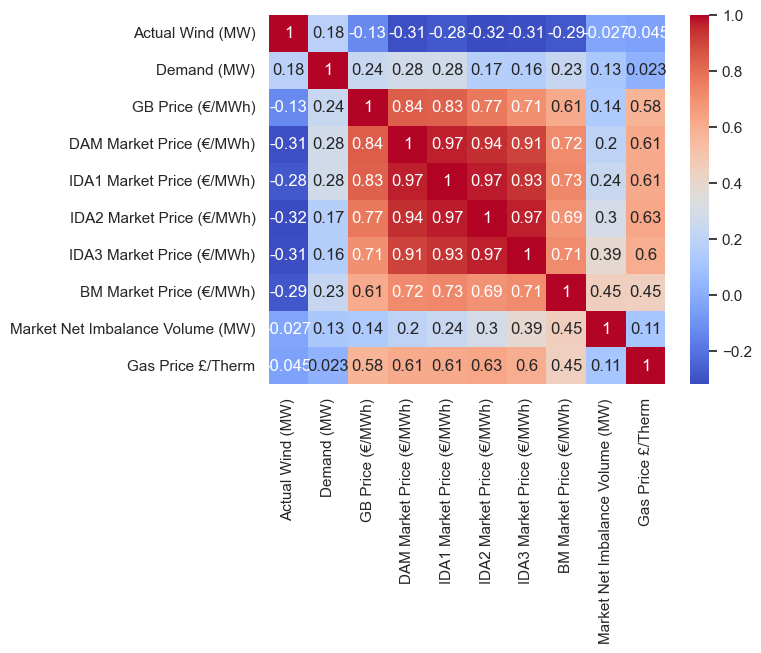

In [549]:
# Calculate correlation matrix
# Create a correlation matrix
corr_matrix = copy_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

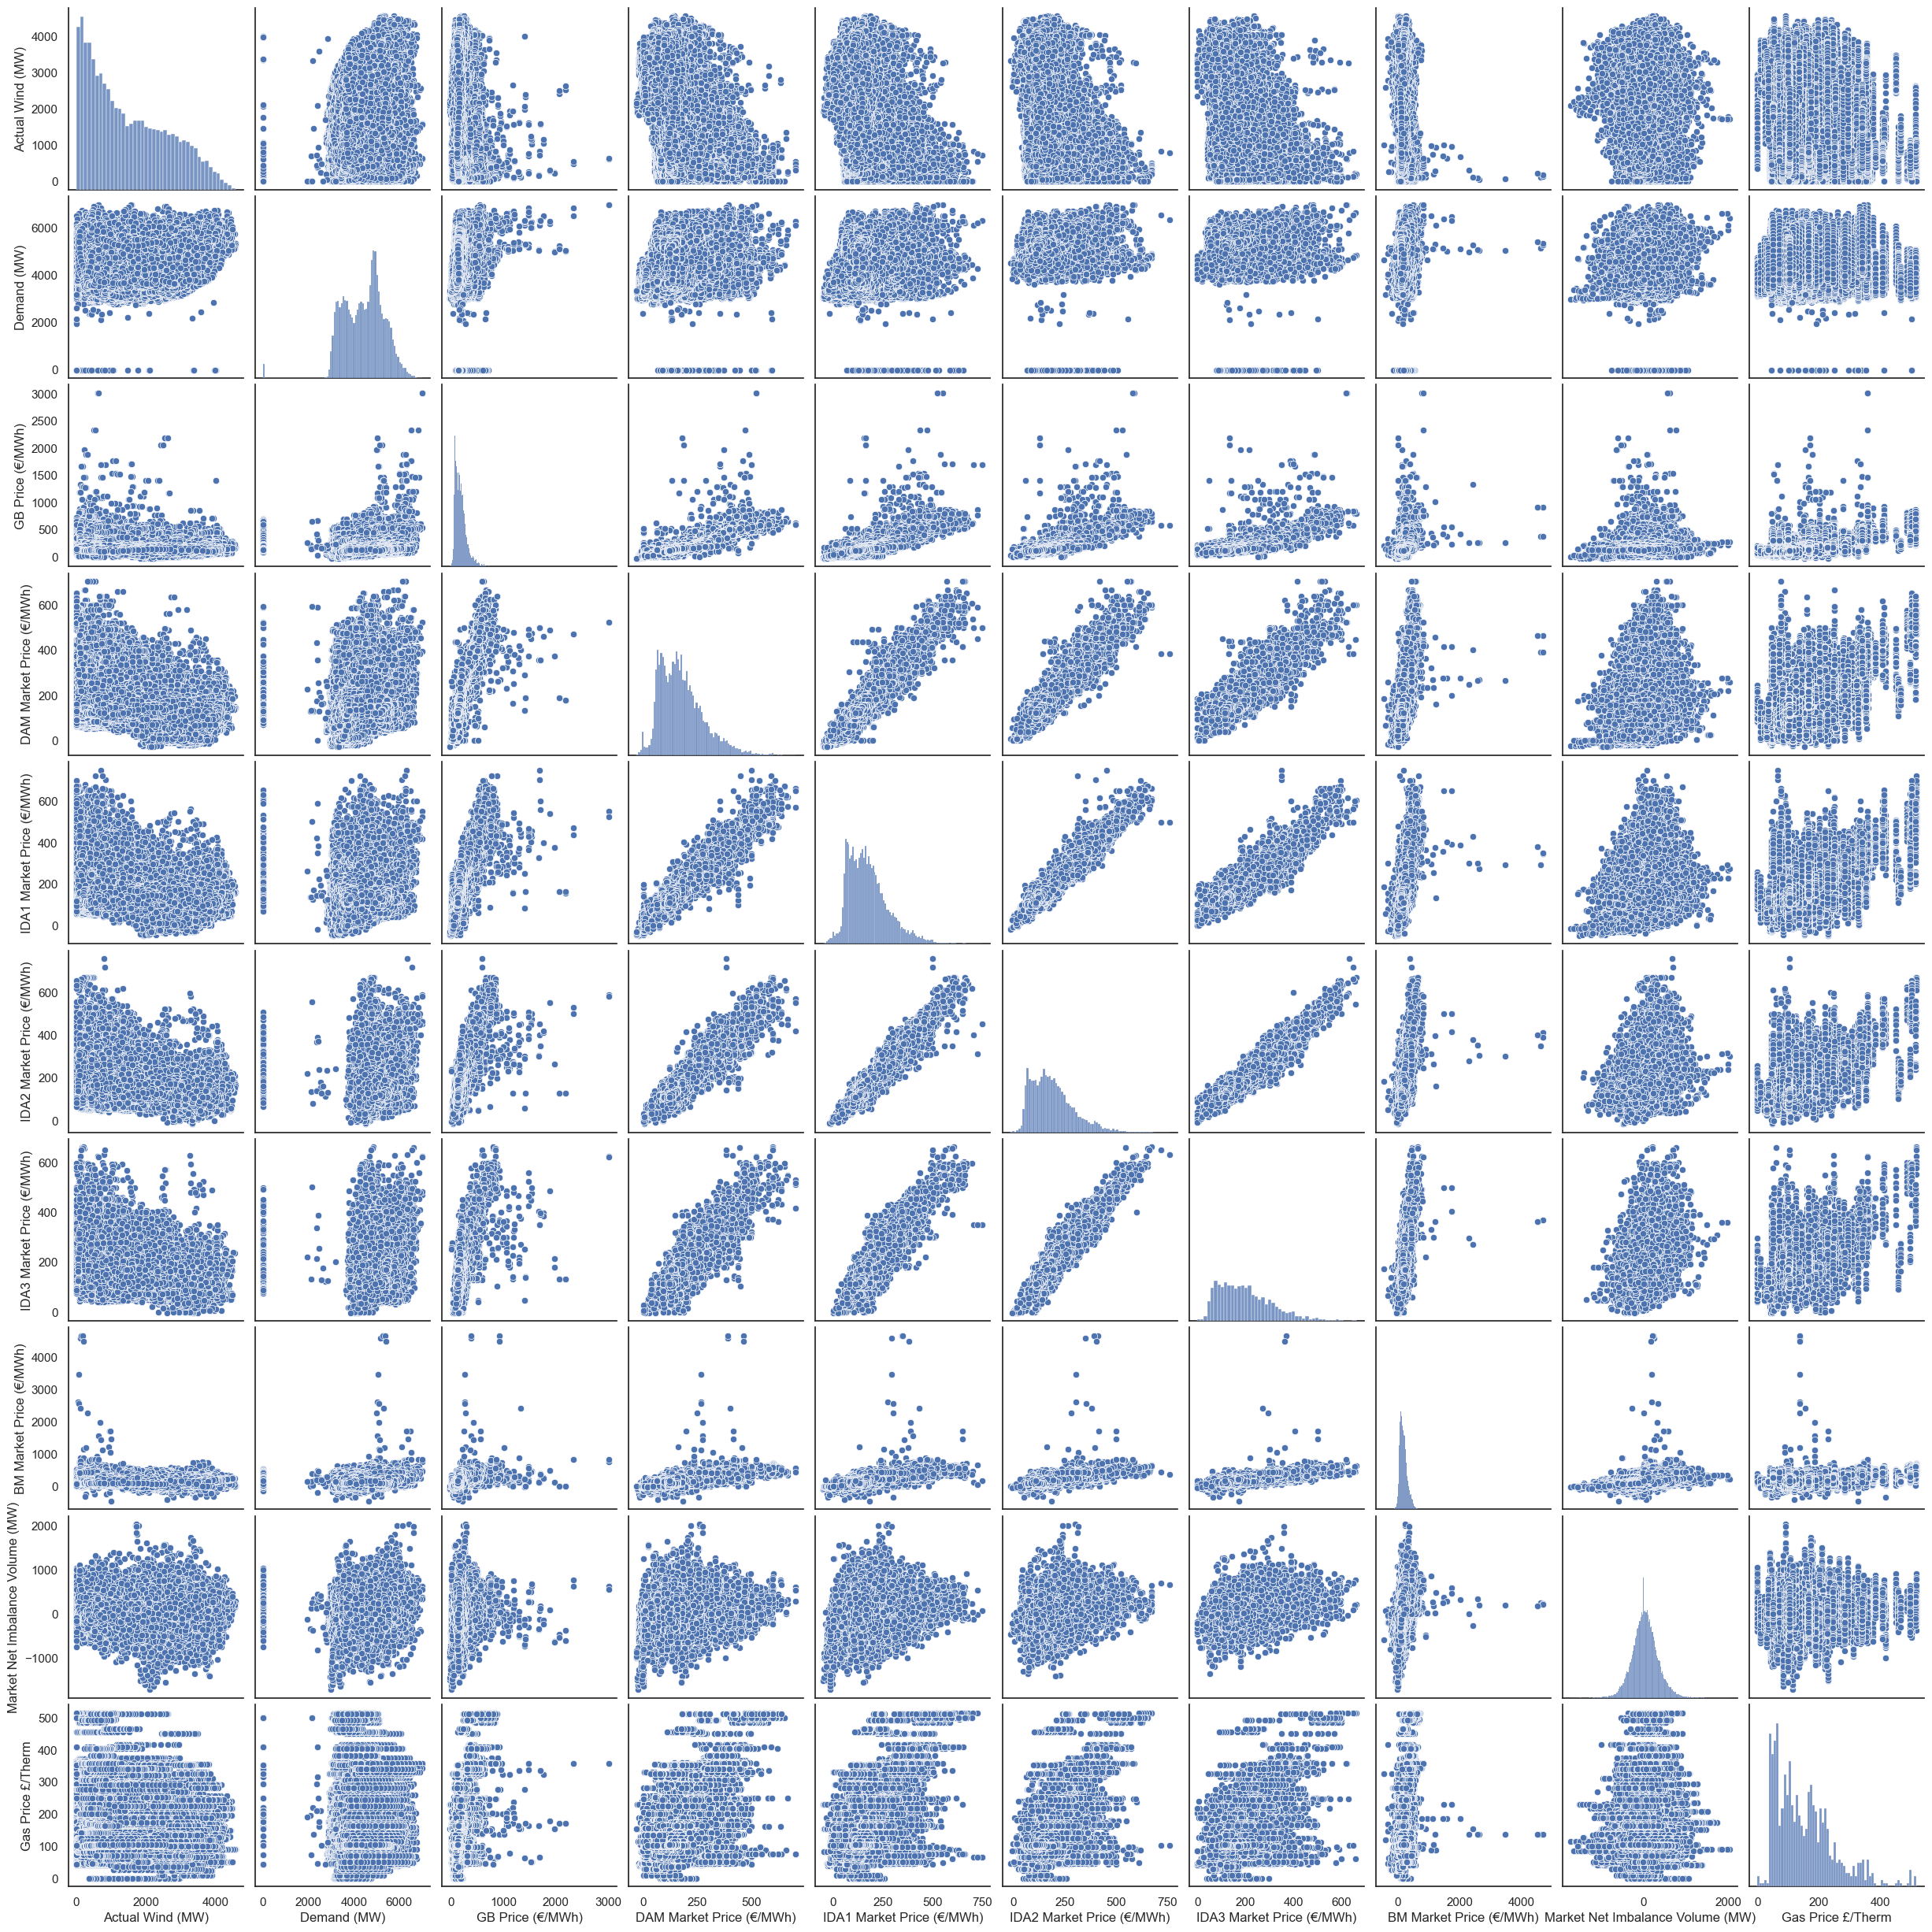

In [550]:
sns.pairplot(copy_df)

In [551]:
copy_df.dtypes

Trade Date                           object
Actual Wind (MW)                    float64
Demand (MW)                         float64
GB Price (€/MWh)                    float64
DAM Market Price (€/MWh)            float64
IDA1 Market Price (€/MWh)           float64
IDA2 Market Price (€/MWh)           float64
IDA3 Market Price (€/MWh)           float64
BM Market Price (€/MWh)             float64
Market Net Imbalance Volume (MW)    float64
Gas Price £/Therm                   float64
dtype: object

In [552]:
# Changing datatype of startdate to date only

copy_df["Trade Date"] = pd.to_datetime(copy_df["Trade Date"])
copy_df.dtypes

C:\Users\chait\AppData\Local\Temp\ipykernel_3168\1728543492.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  copy_df["Trade Date"] = pd.to_datetime(copy_df["Trade Date"])


Trade Date                          datetime64[ns]
Actual Wind (MW)                           float64
Demand (MW)                                float64
GB Price (€/MWh)                           float64
DAM Market Price (€/MWh)                   float64
IDA1 Market Price (€/MWh)                  float64
IDA2 Market Price (€/MWh)                  float64
IDA3 Market Price (€/MWh)                  float64
BM Market Price (€/MWh)                    float64
Market Net Imbalance Volume (MW)           float64
Gas Price £/Therm                          float64
dtype: object

In [553]:
copy_df

,Trade Date,Actual Wind (MW),Demand (MW),GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW),Gas Price £/Therm
0,2021-01-01,2690.0,4209.0,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488,NaN
1,2021-01-01,2571.0,4159.0,74.97900,55.09,66.66,NaN,NaN,26.57,62.496,NaN
2,2021-01-01,2506.0,4016.0,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048,57.75
3,2021-01-01,2513.0,3891.0,75.53440,54.02,67.00,NaN,NaN,25.95,-153.720,57.75
4,2021-01-01,2503.0,3767.0,69.64716,53.00,64.00,NaN,NaN,26.06,-86.304,57.75
...,...,...,...,...,...,...,...,...,...,...,...
39445,2023-03-31,1764.0,5243.0,130.78950,135.80,125.11,115.00,105.00,100.52,-71.112,104.25
39446,2023-03-31,1618.0,5240.0,126.24030,132.38,136.68,127.72,119.41,103.30,-128.352,104.25
39447,2023-03-31,1530.0,5249.0,126.24030,132.38,125.00,112.70,113.12,103.35,-189.444,104.25
39448,2023-03-31,1467.0,5121.0,114.18492,121.40,131.25,121.00,119.17,103.97,-112.740,104.25


In [554]:
copy_df

,Trade Date,Actual Wind (MW),Demand (MW),GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW),Gas Price £/Therm
0,2021-01-01,2690.0,4209.0,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488,NaN
1,2021-01-01,2571.0,4159.0,74.97900,55.09,66.66,NaN,NaN,26.57,62.496,NaN
2,2021-01-01,2506.0,4016.0,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048,57.75
3,2021-01-01,2513.0,3891.0,75.53440,54.02,67.00,NaN,NaN,25.95,-153.720,57.75
4,2021-01-01,2503.0,3767.0,69.64716,53.00,64.00,NaN,NaN,26.06,-86.304,57.75
...,...,...,...,...,...,...,...,...,...,...,...
39445,2023-03-31,1764.0,5243.0,130.78950,135.80,125.11,115.00,105.00,100.52,-71.112,104.25
39446,2023-03-31,1618.0,5240.0,126.24030,132.38,136.68,127.72,119.41,103.30,-128.352,104.25
39447,2023-03-31,1530.0,5249.0,126.24030,132.38,125.00,112.70,113.12,103.35,-189.444,104.25
39448,2023-03-31,1467.0,5121.0,114.18492,121.40,131.25,121.00,119.17,103.97,-112.740,104.25


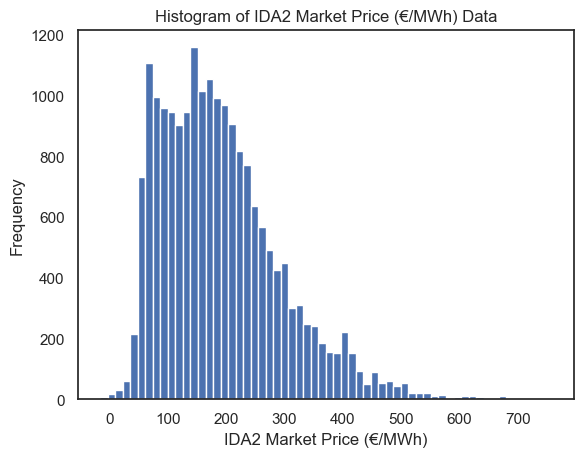

In [555]:

# plotting for IDA2 Market Price (€/MWh) for checkin NaN values

plt.hist(copy_df['IDA2 Market Price (€/MWh)'], bins=60)
plt.xlabel('IDA2 Market Price (€/MWh)')
plt.ylabel('Frequency')
plt.title('Histogram of IDA2 Market Price (€/MWh) Data')
plt.show()

In [556]:
# filling NaN from this column

#median = copy_df['IDA2 Market Price (€/MWh)'].median()
#copy_df['IDA2 Market Price (€/MWh)'].fillna(median, inplace=True)


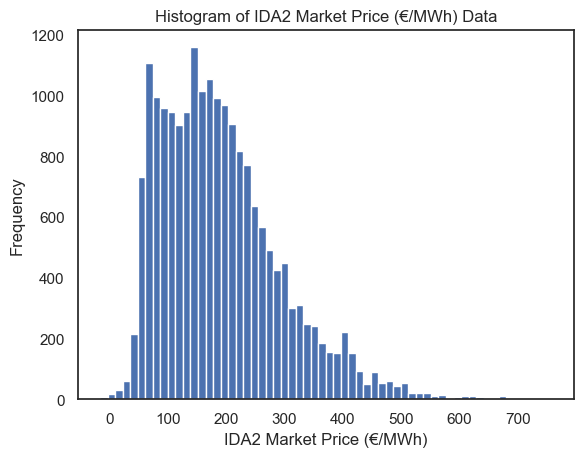

In [557]:
plt.hist(copy_df['IDA2 Market Price (€/MWh)'], bins=60)
plt.xlabel('IDA2 Market Price (€/MWh)')
plt.ylabel('Frequency')
plt.title('Histogram of IDA2 Market Price (€/MWh) Data')
plt.show()

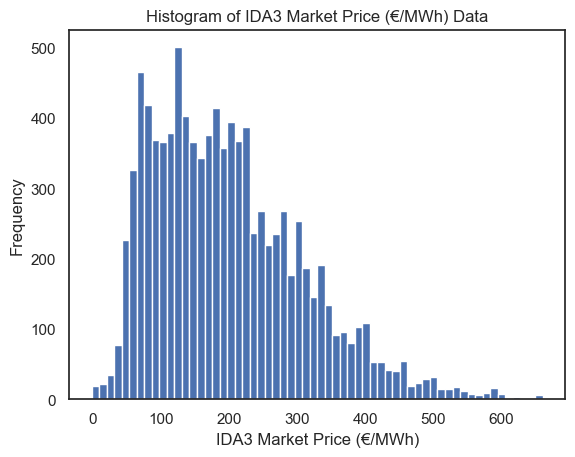

In [558]:

# plotting for IDA2 Market Price (€/MWh) for checkin NaN values

plt.hist(copy_df['IDA3 Market Price (€/MWh)'], bins=60)
plt.xlabel('IDA3 Market Price (€/MWh)')
plt.ylabel('Frequency')
plt.title('Histogram of IDA3 Market Price (€/MWh) Data')
plt.show()

In [559]:
# filling NaN from this column

#median = copy_df['IDA3 Market Price (€/MWh)'].median()
#copy_df['IDA3 Market Price (€/MWh)'].fillna(median, inplace=True)

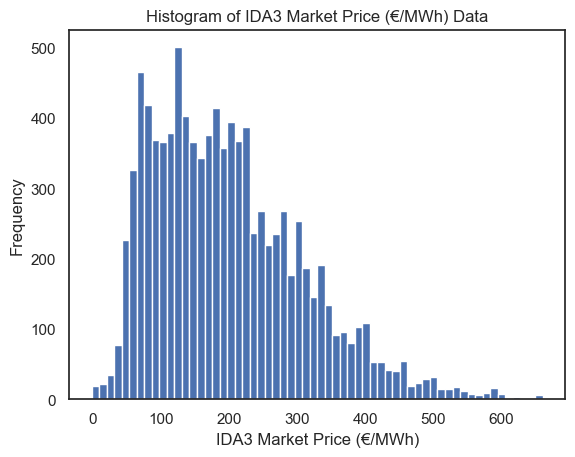

In [560]:
# plotting for IDA2 Market Price (€/MWh) for checkin NaN values

plt.hist(copy_df['IDA3 Market Price (€/MWh)'], bins=60)
plt.xlabel('IDA3 Market Price (€/MWh)')
plt.ylabel('Frequency')
plt.title('Histogram of IDA3 Market Price (€/MWh) Data')
plt.show()

In [561]:
copy_df

,Trade Date,Actual Wind (MW),Demand (MW),GB Price (€/MWh),DAM Market Price (€/MWh),IDA1 Market Price (€/MWh),IDA2 Market Price (€/MWh),IDA3 Market Price (€/MWh),BM Market Price (€/MWh),Market Net Imbalance Volume (MW),Gas Price £/Therm
0,2021-01-01,2690.0,4209.0,74.97900,55.09,87.55,NaN,NaN,16.26,-85.488,NaN
1,2021-01-01,2571.0,4159.0,74.97900,55.09,66.66,NaN,NaN,26.57,62.496,NaN
2,2021-01-01,2506.0,4016.0,75.53440,54.02,61.58,NaN,NaN,30.83,-93.048,57.75
3,2021-01-01,2513.0,3891.0,75.53440,54.02,67.00,NaN,NaN,25.95,-153.720,57.75
4,2021-01-01,2503.0,3767.0,69.64716,53.00,64.00,NaN,NaN,26.06,-86.304,57.75
...,...,...,...,...,...,...,...,...,...,...,...
39445,2023-03-31,1764.0,5243.0,130.78950,135.80,125.11,115.00,105.00,100.52,-71.112,104.25
39446,2023-03-31,1618.0,5240.0,126.24030,132.38,136.68,127.72,119.41,103.30,-128.352,104.25
39447,2023-03-31,1530.0,5249.0,126.24030,132.38,125.00,112.70,113.12,103.35,-189.444,104.25
39448,2023-03-31,1467.0,5121.0,114.18492,121.40,131.25,121.00,119.17,103.97,-112.740,104.25


In [562]:
# convert Trade Date to pandas datetime format
copy_df['Trade Date'] = pd.to_datetime(copy_df['Trade Date'])

# set a reference date
ref_date = pd.to_datetime('2021-01-01')

# convert Trade Date to numeric format (number of days since ref_date)
copy_df['Trade Date'] = (copy_df['Trade Date'] - ref_date).dt.days

In [566]:
# replaceing null values with 0 in dataframe
copy_df.fillna(0, inplace=True)

In [563]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

# Define the input features (X) and target variables (y)
X = copy_df[['Trade Date', 'Actual Wind (MW)', 'Demand (MW)', 'GB Price (€/MWh)', 'Market Net Imbalance Volume (MW)', 'Gas Price £/Therm']]
y = copy_df[['DAM Market Price (€/MWh)', 'IDA1 Market Price (€/MWh)', 'IDA2 Market Price (€/MWh)', 'IDA3 Market Price (€/MWh)', 'BM Market Price (€/MWh)']]

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the NIV model using Keras
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(5))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions on new data
#new_data = pd.DataFrame([['2023-05-04', 3000.0, 4000.0, 70.0, 60.0, -100.0, 50.0]], columns=X.columns)

predictions = model.predict(X_test)
print('Predictions:', predictions)


370/370 [==============================] - 1s 2ms/step - loss: nan
Test loss: nan
370/370 [==============================] - 1s 1ms/step
Predictions: [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 ...
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [568]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

# Define the input features (X) and target variables (y)
X = copy_df[['Trade Date', 'Actual Wind (MW)', 'Demand (MW)', 'GB Price (€/MWh)', 'Market Net Imbalance Volume (MW)', 'Gas Price £/Therm']]
y = copy_df[['DAM Market Price (€/MWh)', 'IDA1 Market Price (€/MWh)', 'IDA2 Market Price (€/MWh)', 'IDA3 Market Price (€/MWh)', 'BM Market Price (€/MWh)']]

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the NIV model using Keras
model = Sequential()
model.add(Dense(256, input_dim=6, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(5))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions on new data
#new_data = pd.DataFrame([['2023-05-04', 3000.0, 4000.0, 70.0, 60.0, -100.0, 50.0]], columns=X.columns)

predictions = model.predict(X_test)
print('Predictions:', predictions)


370/370 [==============================] - 2s 6ms/step - loss: 4049.5276
Test loss: 4049.527587890625
370/370 [==============================] - 2s 6ms/step
Predictions: [[173.03523   175.88075   139.52979    69.017586  225.96628  ]
 [132.81729   128.24551    99.887886   42.218666  112.35566  ]
 [253.4316    254.79451   242.54271   162.5526    289.50742  ]
 ...
 [183.59381   174.66167   138.31317    59.177563  126.61356  ]
 [209.00565   211.23969   146.97931    51.708393  272.52908  ]
 [107.35565   109.04593     7.314929   -0.3657951 142.12865  ]]


In [569]:
from sklearn.metrics import r2_score

# Calculate R2 score on the test data
r2 = r2_score(y_test, predictions)
print('R2 score:', r2)

R2 score: 0.68718251178635
